## ISS panel exploration

Set-up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
import anndata
import scvelo as scv

In [3]:
import cellrank as cr

In [4]:
# figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/PAGA_graphs/"
# if os.path.exists(figdir):
#     sc.settings.figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/PAGA_graphs/"
# else:
#     os.mkdir(figdir)
#     sc.settings.figdir = "/home/jovyan/mount/gdrive/Pan_fetal/Updates_and_presentations/figures/PAGA_graphs/"
    

In [5]:
# ## Directory to save intermediate outputs
# writedir = "/nfs/team205/ed6/data/Fetal_immune/PAGA_FA_outs/"
# if not os.path.exists(writedir):
#     os.mkdir(writedir)    

In [6]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [7]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

Activate the anndata2ri conversion between SingleCellExperiment and AnnData

In [8]:
anndata2ri.activate()

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
library(tidyverse)

### Load panel

provided by Anna WC

In [11]:
indir = "/home/jovyan/mount/gdrive/Pan_fetal/significant_genes/ISS_panels/"

In [12]:
panel_immune = pd.read_csv(indir + 'CARTANA_GeneList_Immune_General_20200711_v0.2.csv')
panel_immune

,Gene symbol mouse,Gene symbol human,Alias,Annotation,Gene full name,MGI ID,HGNC ID,ENSEMBL GeneID mouse,ENSEMBL GeneID human,Unnamed: 9
0,Ptprc,PTPRC,B220;CD45R;Cd45;L-CA;Ly-5;Lyt-4;T200;loc;B220;...,hematopoietic lineage,protein tyrosine phosphatase receptor type C,MGI:97810,HGNC:9666,ENSMUSG00000026395,ENSG00000081237,
1,Cd34,CD34,AU040960,hematopoietic stem cells and endothelial cells,CD34 molecule,MGI:88329,HGNC:1662,ENSMUSG00000016494,ENSG00000174059,
2,Cd40,CD40,AI326936;Bp50;GP39;HIGM1;IGM;IMD3;T-BAM;TRAP;T...,antigen presenting cells (APC),CD40 molecule,MGI:88336,HGNC:11919,ENSMUSG00000017652,ENSG00000101017,
3,Cd80,CD80,B71;Cd28l;Ly-53;Ly53;MIC17;TSA1;B7;B7-1;B7.1;B...,antigen presenting cells (APC),CD80 molecule,MGI:101775,HGNC:1700,ENSMUSG00000075122,ENSG00000121594,
4,Fcgr1,NaN,AI323638;AV092959;CD64;FcgammaRI;IGGHAFC,macrophages and monocytes,"Fc receptor, IgG, high affinity I",MGI:95498,NaN,ENSMUSG00000015947,NaN,
5,NaN,FCGR1A,CD64;CD64A;FCRI;IGFR1,macrophages and monocytes,Fc fragment of IgG receptor Ia,NaN,HGNC:3613,NaN,ENSG00000150337,
6,S100a8,S100A8,60B8Ag;AI323541;B8Ag;CFAg;CP-10;Caga;MRP8;p8;6...,monocytes,S100 calcium binding protein A8,MGI:88244,HGNC:10498,ENSMUSG00000056054,ENSG00000143546,
7,Cd14,CD14,NaN,CD14+ monocytes,CD14 molecule,MGI:88318,HGNC:1628,ENSMUSG00000051439,ENSG00000170458,
8,Fcgr3,NaN,CD16,CD16+ monocytes,"Fc receptor, IgG, low affinity III",MGI:95500,NaN,ENSMUSG00000059498,NaN,
9,NaN,FCGR3A,CD16;CD16A;FCG3;FCGR3;FCGRIII;FCR-10;FCRIII;FC...,CD16+ monocytes,Fc fragment of IgG receptor IIIa,NaN,HGNC:3619,NaN,ENSG00000203747,


In [13]:
panel_lung_custom = pd.read_csv(indir + 'codebook_long2short.csv')

In [14]:
panel_lung_custom['gene'][panel_lung_custom['gene'].isin(panel_immune["Gene symbol human"])]

8      CD34
34    PTPRC
67    FOLR2
Name: gene, dtype: object

In [15]:
panel_lung_custom = panel_lung_custom["gene"]

panel_immune = panel_immune["Gene symbol human"]
panel_immune.dropna(inplace=True)
panel_immune.name = "gene"

## Load dataset

In [16]:
data_dir = '/nfs/team205/ed6/data/Fetal_immune/'
timestamp = '20210429'

adata = sc.read_h5ad('{d}PAN.A01.v01.entire_data_raw_count.{t}.h5ad'.format(d=data_dir, t=timestamp))

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


### Load results from scVI

In [17]:
def load_scvi_outs(adata, emb_file):
    X_scVI_emb = np.load(emb_file)
    X_scVI_umap = np.load(emb_file.rstrip(".npy") + ".UMAP.npy")
    X_scVI_clust = pd.read_csv(emb_file.rstrip(".npy") + ".clustering.csv", index_col=0)
    adata.obsm["X_scvi"] = X_scVI_emb
    adata.obsm["X_umap"] = X_scVI_umap
    adata.obs["scvi_clusters"] = X_scVI_clust.loc[adata.obs_names]["leiden_150"].astype("category")

In [18]:
load_scvi_outs(adata, data_dir + "scVI_outs/PAN.A01.v01.entire_data_raw_count.{t}.scVI_out.npy".format(t=timestamp))

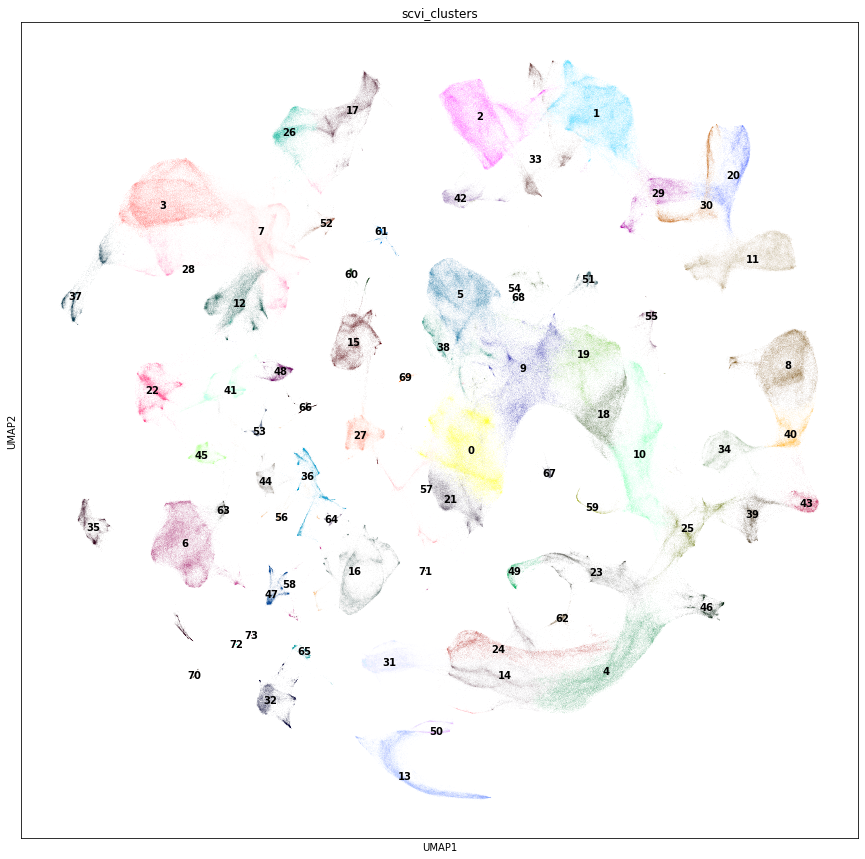

In [19]:
plt.rcParams["figure.figsize"] = [15,15]
sc.pl.umap(adata, color="scvi_clusters", legend_loc="on data")

In [20]:
## Filter maternal contaminants
mat_barcodes = pd.read_csv("~/Pan_fetal_immune/metadata/souporcell_results/maternal_barcodes.csv", index_col=0)
mat_barcodes["x"] = pd.Series([x.split("-1")[0] for x in mat_barcodes['x']])

### Load annotations

In [21]:
anno_obs = pd.read_csv(data_dir + "PAN.A01.v01.entire_data_normalised_log.20210429.full_obs.annotated.clean.csv", index_col=0)

In [22]:
adata = adata[(~adata.obs_names.isin(mat_barcodes["x"])) & (adata.obs_names.isin(anno_obs.index))]

In [23]:
adata.obs = anno_obs.loc[adata.obs_names].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [24]:
## Read annotation groupings
import json
with open('../../metadata/anno_groups.json', 'r') as json_file:
    anno_groups_dict = json.load(json_file)
anno_groups_dict_rev = {x:g for g,a in anno_groups_dict.items() for x in a}

In [25]:
adata.obs["anno_group"] = [anno_groups_dict_rev[x] for x in adata.obs["anno_lvl_2_final_clean"]]

### Convert to logCPM

In [26]:
sc.pp.normalize_total(adata, target_sum=1000000)
sc.pp.log1p(adata)

In [27]:
adata

AnnData object with n_obs × n_vars = 908178 × 33538
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'anno_lvl_1_LYMPHOID', 'anno_lvl_2_LYMPHOID', 'anno_lvl_1_MYELOID', 'anno_lvl_2_MYELOID', 'anno_lvl_1_MEM_PROGENITORS', 'anno_lvl_2_MEM_PROGENITORS', 'is_annotated', 'is_uniquely_annotated', 'anno_lvl_2_final', 'anno_lvl_1_STROMA', 'anno_lvl_2_STROMA', 'anno_lvl_2_final_clean', 'anno_group'
    var: 'GeneID', 'GeneName'
    uns: 'scvi_clusters_colors', 'log1p'
    obsm: 'X_scvi', 'X_umap'

### Check expression of panel genes in pan fetal dataset

#### Immune panel

In [26]:
all(panel_immune.isin(adata.var_names))

True

In [27]:
adata.var_names_make_unique()

In [28]:
sdata_immune = adata[:, adata.var_names.isin(panel_immune)].copy()

In [29]:
# sc.pp.filter_cells(sdata_immune, min_counts=0.1)

In [30]:
sdata_immune.layers["is_expressed"] = sdata_immune.X.copy()
sdata_immune.layers["is_expressed"][sdata_immune.layers["is_expressed"].nonzero()] = 1

In [123]:
sdata_immune.obs['n_genes_panel'] = np.array(sdata_immune.layers["is_expressed"].sum(1)).ravel()

Text(0.5, 0, '# panel genes expressed')

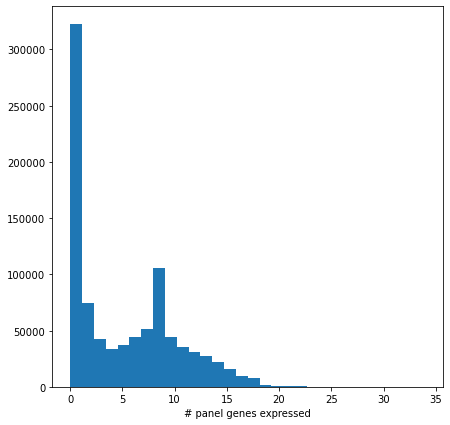

In [124]:
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(sdata_immune.obs['n_genes_panel'], bins=30);
plt.xlabel("# panel genes expressed")

Which cells express none of these genes?

In [125]:
n_expr_df = sdata_immune.obs[['n_genes_panel', 'anno_lvl_2_final_clean']]

In [126]:
%%R -i n_expr_df 
head(n_expr_df) 

                                n_genes_panel anno_lvl_2_final_clean
FCAImmP7579224-ATTACTCTCGATGAGG            13                    DC3
FCAImmP7579224-CAGCCGAGTACATCCA             3              EARLY_ERY
FCAImmP7579224-TGCTACCTCATGTAGC            12                    DC3
FCAImmP7579224-ACGGCCACAAGCTGAG            16                    DC2
FCAImmP7579224-CTAATGGCACTGTGTA            11            LARGE_PRE_B
FCAImmP7579224-ATTATCCAGGTTACCT            14                    DC3


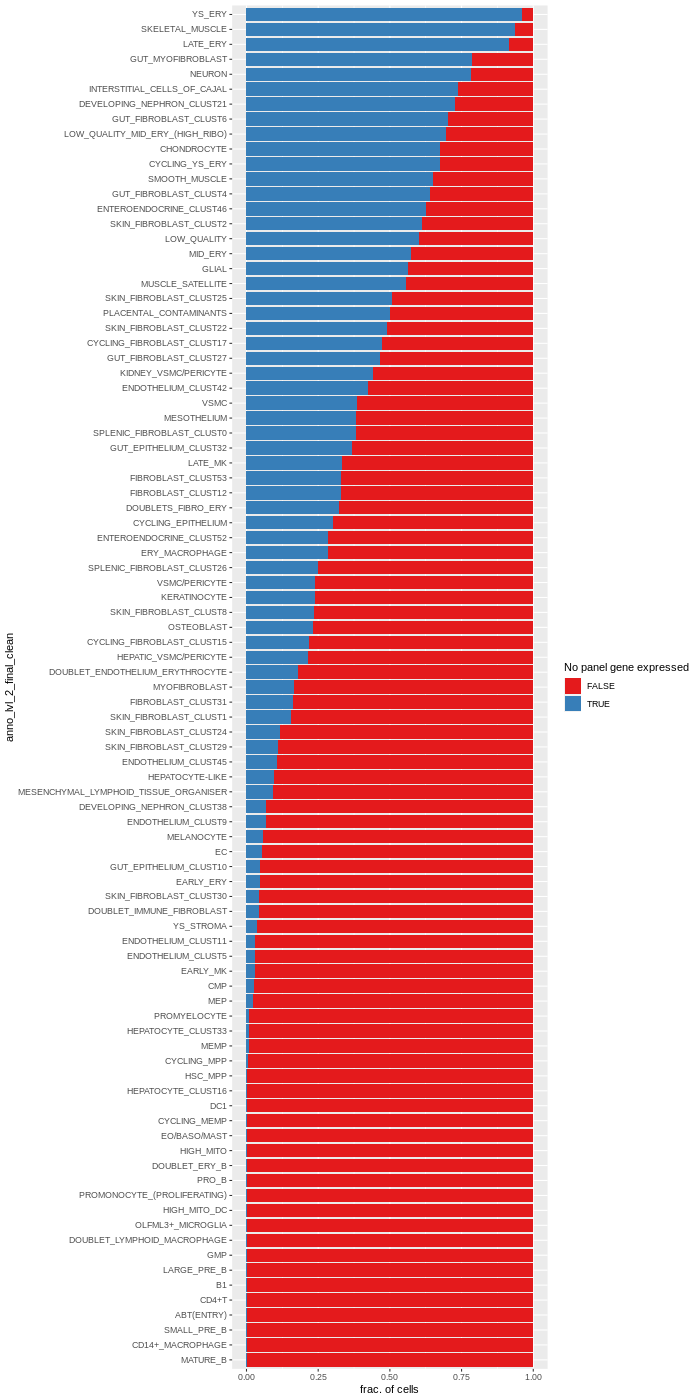

In [127]:
%%R -h 1400 -w 700
n_expr_df %>%
    mutate(no_gene = n_genes_panel == 0) %>%
    group_by(anno_lvl_2_final_clean) %>%
    mutate(n_zeros = sum(no_gene), n=n()) %>%
    mutate(frac=n_zeros/n) %>%
    ungroup() %>%
    filter(n_zeros > 0) %>%
    arrange(frac) %>%
    mutate(anno_lvl_2_final_clean = factor(anno_lvl_2_final_clean, levels=unique(anno_lvl_2_final_clean))) %>%
    ggplot(aes(anno_lvl_2_final_clean, fill=no_gene)) +
    geom_bar(position="fill") +
    coord_flip() +
    ylab("frac. of cells") +
    scale_fill_brewer(palette="Set1", name="No panel gene expressed")

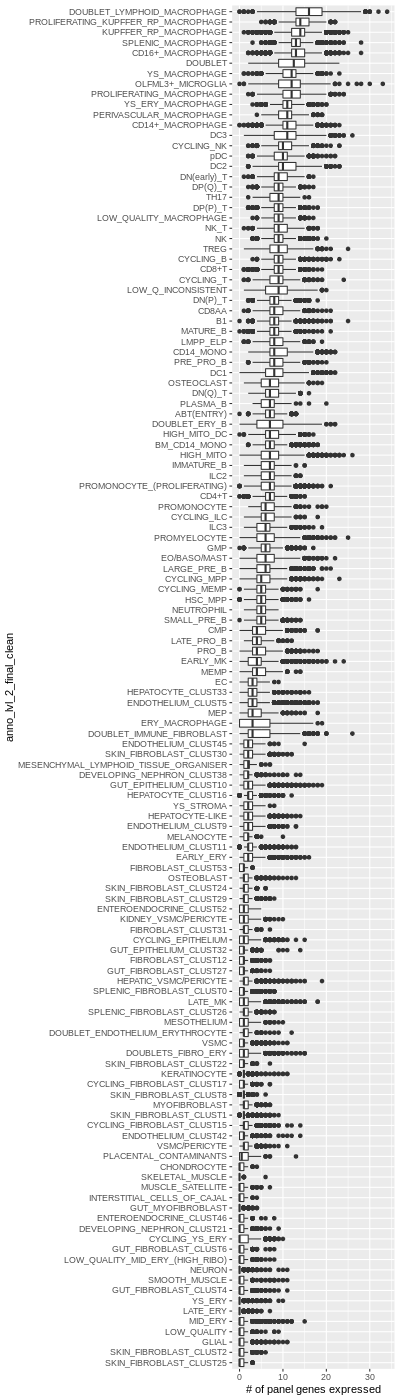

In [128]:
%%R -h 1400 -w 400
n_expr_df %>%
    group_by(anno_lvl_2_final_clean) %>%
    mutate(mean_n_gene=median(n_genes_panel)) %>%
    ungroup() %>%
    arrange(mean_n_gene) %>%
    mutate(anno_lvl_2_final_clean = factor(anno_lvl_2_final_clean, levels=unique(anno_lvl_2_final_clean))) %>%

   ggplot(aes(anno_lvl_2_final_clean, n_genes_panel)) +
    geom_boxplot() +
    coord_flip() +
    ylab("# of panel genes expressed")

#### Lung custom panel

In [31]:
panel_lung_custom[~panel_lung_custom.isin(adata.var_names)]

70    HLA-DRB6
Name: gene, dtype: object

In [32]:
sdata_lung = adata[:, adata.var_names.isin(panel_lung_custom)].copy()

In [33]:
sdata_lung.layers["is_expressed"] = sdata_lung.X.copy()
sdata_lung.layers["is_expressed"][sdata_lung.layers["is_expressed"].nonzero()] = 1

In [34]:
sdata_lung.obs['n_genes_panel'] = np.array(sdata_lung.layers["is_expressed"].sum(1)).ravel()

Text(0.5, 0, '# panel genes expressed')

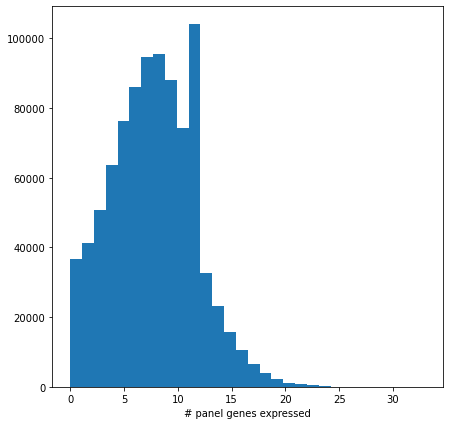

In [133]:
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(sdata_lung.obs['n_genes_panel'], bins=30);
plt.xlabel("# panel genes expressed")

Which cells express none of these genes?

In [134]:
n_expr_df = sdata_lung.obs[['n_genes_panel', 'anno_lvl_2_final_clean']]

In [135]:
%%R -i n_expr_df 
head(n_expr_df) 

                                n_genes_panel anno_lvl_2_final_clean
FCAImmP7579224-ATTACTCTCGATGAGG            17                    DC3
FCAImmP7579224-CAGCCGAGTACATCCA            14              EARLY_ERY
FCAImmP7579224-TGCTACCTCATGTAGC            14                    DC3
FCAImmP7579224-ACGGCCACAAGCTGAG            16                    DC2
FCAImmP7579224-CTAATGGCACTGTGTA            12            LARGE_PRE_B
FCAImmP7579224-ATTATCCAGGTTACCT            15                    DC3


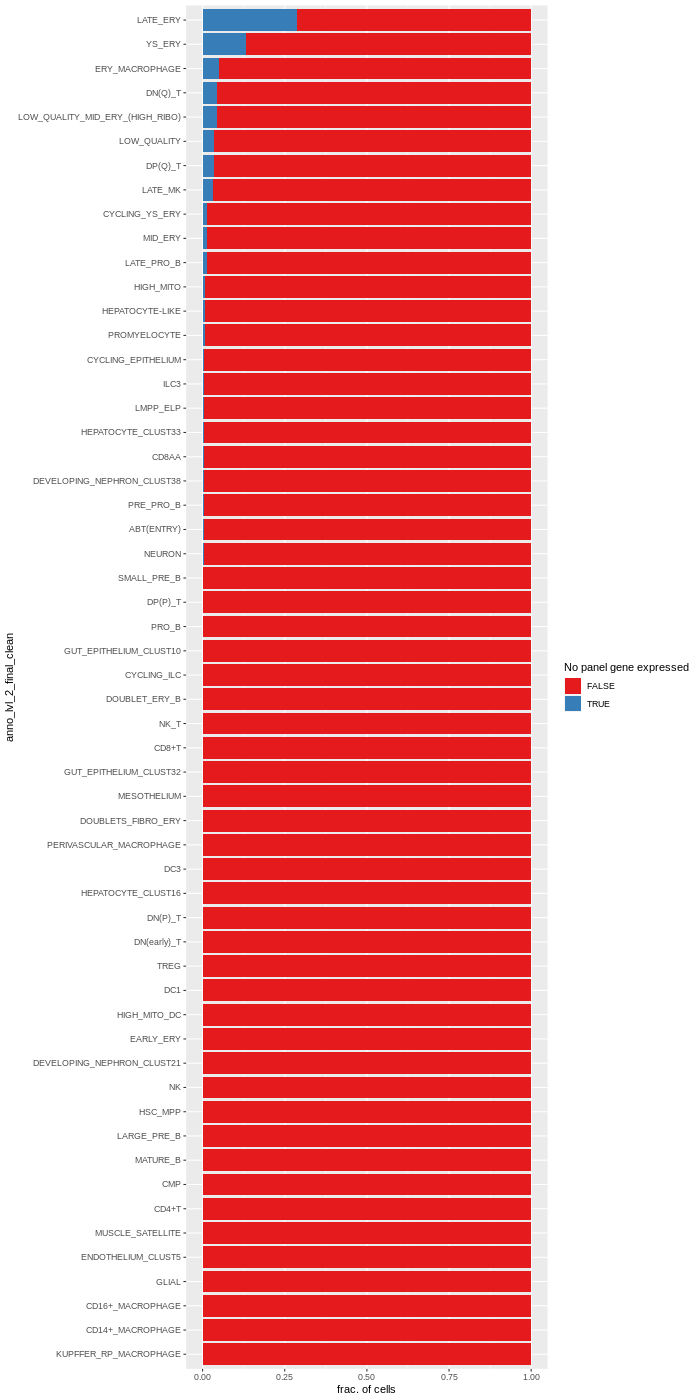

In [138]:
%%R -h 1400 -w 700
n_expr_df %>%
    mutate(no_gene = n_genes_panel == 0) %>%
    group_by(anno_lvl_2_final_clean) %>%
    mutate(n_zeros = sum(no_gene), n=n()) %>%
    mutate(frac=n_zeros/n) %>%
    ungroup() %>%
    filter(n_zeros > 0) %>%
    arrange(frac) %>%
    mutate(anno_lvl_2_final_clean = factor(anno_lvl_2_final_clean, levels=unique(anno_lvl_2_final_clean))) %>%
    ggplot(aes(anno_lvl_2_final_clean, fill=no_gene)) +
    geom_bar(position="fill") +
    coord_flip() +
    ylab("frac. of cells") +
    scale_fill_brewer(palette="Set1", name="No panel gene expressed")

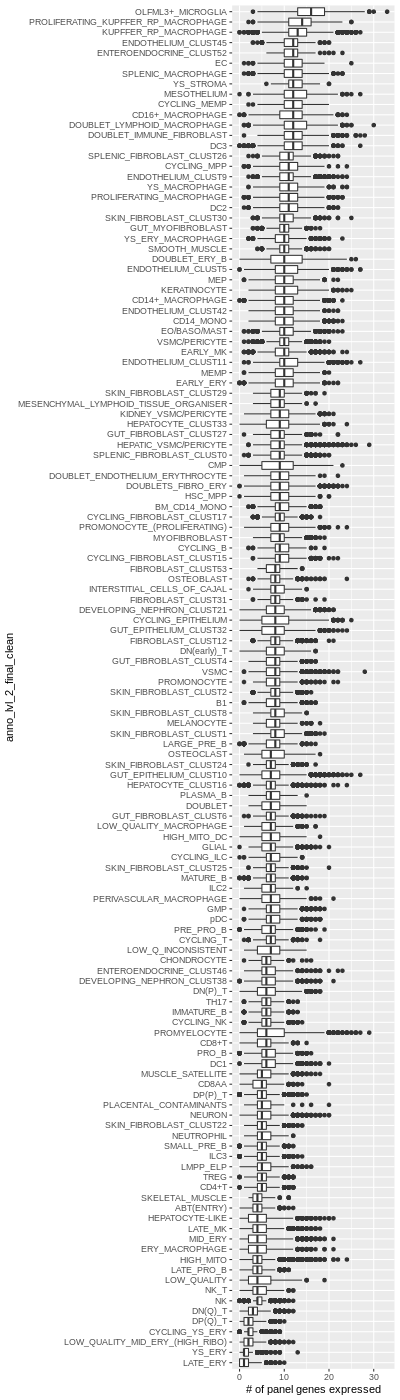

In [137]:
%%R -h 1400 -w 400
n_expr_df %>%
    group_by(anno_lvl_2_final_clean) %>%
    mutate(mean_n_gene=median(n_genes_panel)) %>%
    ungroup() %>%
    arrange(mean_n_gene) %>%
    mutate(anno_lvl_2_final_clean = factor(anno_lvl_2_final_clean, levels=unique(anno_lvl_2_final_clean))) %>%

   ggplot(aes(anno_lvl_2_final_clean, n_genes_panel)) +
    geom_boxplot() +
    coord_flip() +
    ylab("# of panel genes expressed")

#### Mean expression levels

In [38]:
logCPM_range = (7,16)

In [36]:
sdata_lung.X[sdata_lung.X.nonzero()]

matrix([[3.9066198, 4.589662 , 3.5111587, ..., 6.2151103, 8.159306 ,
         6.9072576]], dtype=float32)

In [39]:
## Keep only expr values within the range
sdata_lung.layers["is_highly_expressed"] = sdata_lung.X.copy()
sdata_lung.layers["is_highly_expressed"][sdata_lung.layers["is_highly_expressed"] < logCPM_range[0]] = 0
sdata_lung.layers["is_highly_expressed"][sdata_lung.layers["is_highly_expressed"] > logCPM_range[1]] = 0

sdata_immune.layers["is_highly_expressed"] = sdata_immune.X.copy()
sdata_immune.layers["is_highly_expressed"][sdata_immune.layers["is_highly_expressed"] < logCPM_range[0]] = 0
sdata_immune.layers["is_highly_expressed"][sdata_immune.layers["is_highly_expressed"] > logCPM_range[1]] = 0

In [40]:
sdata_lung.obs['n_panel_genes_highly_expressed'] = np.array(sdata_lung.layers['is_highly_expressed'].sum(1)).ravel()
sdata_immune.obs['n_panel_genes_highly_expressed'] = np.array(sdata_immune.layers['is_highly_expressed'].sum(1)).ravel()

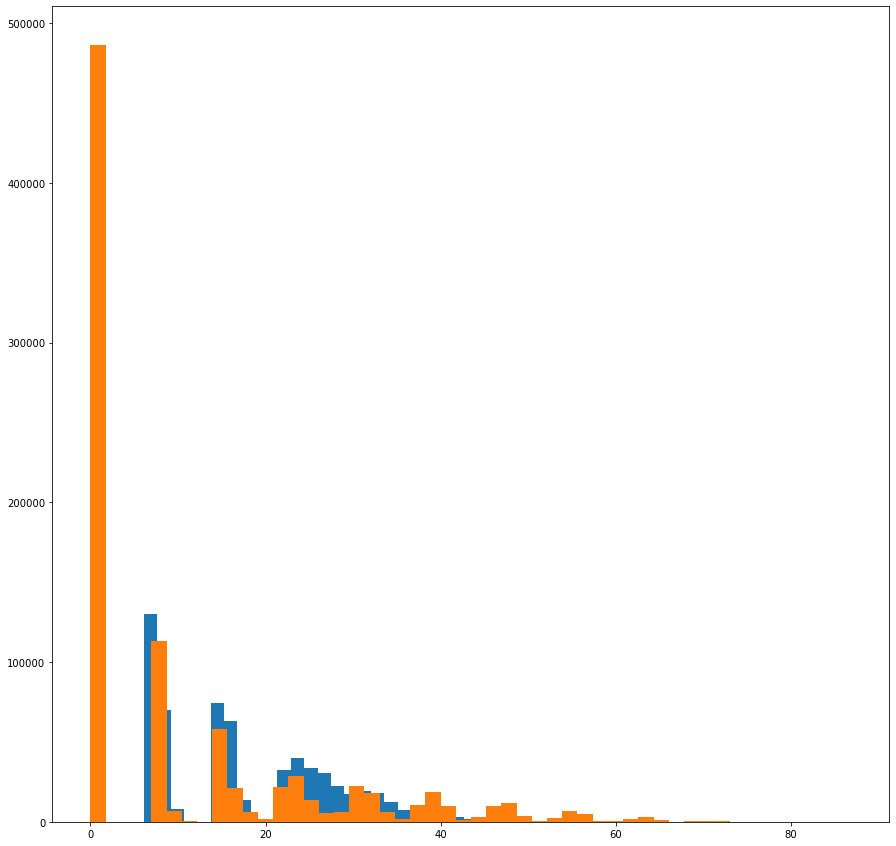

In [41]:
plt.hist(sdata_lung.obs['n_panel_genes_highly_expressed'], bins=50);
plt.hist(sdata_immune.obs['n_panel_genes_highly_expressed'], bins=50);

... storing 'file' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as categorical
... storing 'anno_lvl_2_STROMA' as ca

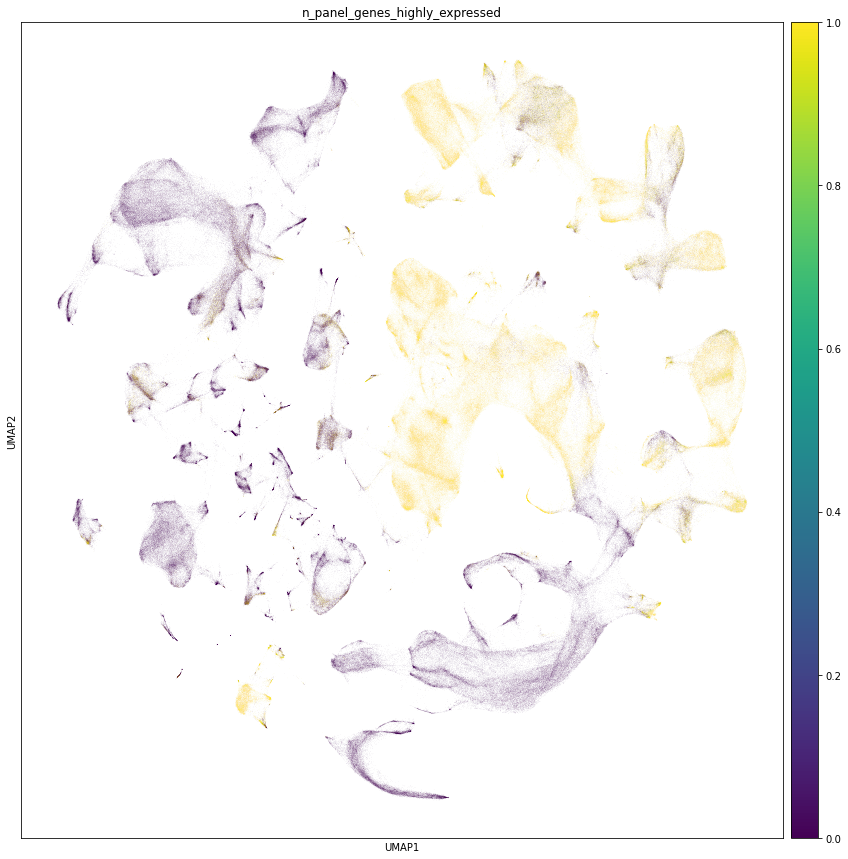

In [42]:
sc.pl.umap(sdata_immune, color='n_panel_genes_highly_expressed', vmax=1)

... storing 'file' as categorical
... storing 'name' as categorical
... storing 'uniform_label' as categorical
... storing 'uniform_label_expanded_merged' as categorical
... storing 'uniform_label_lvl0' as categorical
... storing 'organ' as categorical
... storing 'Sample.lanes' as categorical
... storing 'Sort_id' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'sex' as categorical
... storing 'Processing_method' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Sample' as categorical
... storing 'anno_lvl_1_LYMPHOID' as categorical
... storing 'anno_lvl_2_LYMPHOID' as categorical
... storing 'anno_lvl_1_MYELOID' as categorical
... storing 'anno_lvl_2_MYELOID' as categorical
... storing 'anno_lvl_1_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_MEM_PROGENITORS' as categorical
... storing 'anno_lvl_2_final' as categorical
... storing 'anno_lvl_1_STROMA' as categorical
... storing 'anno_lvl_2_STROMA' as ca

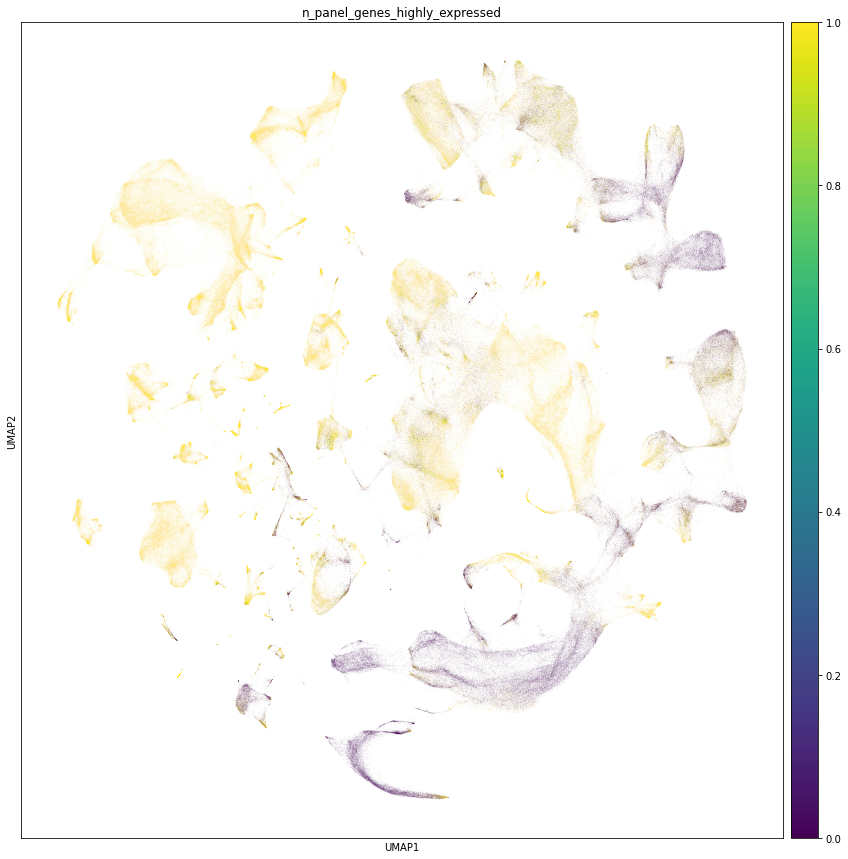

In [43]:
sc.pl.umap(sdata_lung, color='n_panel_genes_highly_expressed', vmax=1)

## Are cell types distinguishable?

In [45]:
sc.pp.scale(sdata_immune, max_value=10)

In [47]:
sc.pp.pca(sdata_immune, use_highly_variable=False)

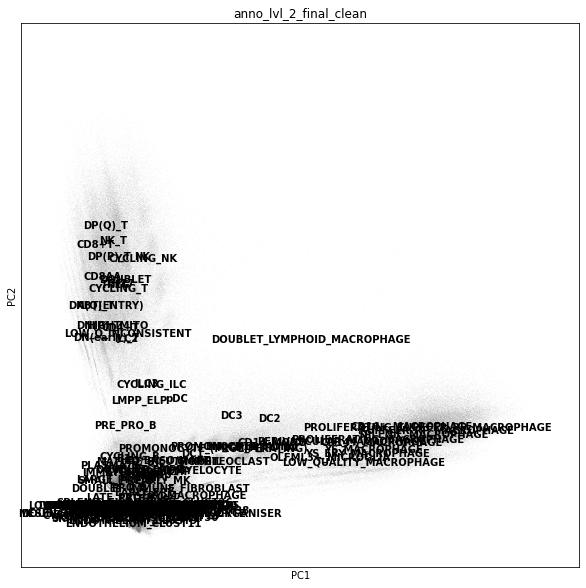

In [52]:
plt.rcParams["figure.figsize"] = [10,10]
sc.pl.pca(sdata_immune, color=["anno_lvl_2_final_clean"], components=["1,2"], legend_loc='on data')

In [57]:
sdata_immune[~sdata_immune.obs.anno_lvl_2_final_clean.isin(anno_groups_dict["STROMA"])]

FCAImmP7579224-ATTACTCTCGATGAGG    False
FCAImmP7579224-CAGCCGAGTACATCCA    False
FCAImmP7579224-TGCTACCTCATGTAGC    False
FCAImmP7579224-ACGGCCACAAGCTGAG    False
FCAImmP7579224-CTAATGGCACTGTGTA    False
                                   ...  
FCAImmP7803042-AGTGGGAGTCGACTGC     True
FCAImmP7803042-CCATTCGTCAACACAC     True
FCAImmP7803042-CGTAGCGAGTGACATA     True
FCAImmP7803042-TGGCCAGCAATGAAAC     True
FCAImmP7803042-ATTGGACAGGAGTACC     True
Name: anno_lvl_2_final_clean, Length: 908178, dtype: bool

Trying to set attribute `.obs` of view, copying.


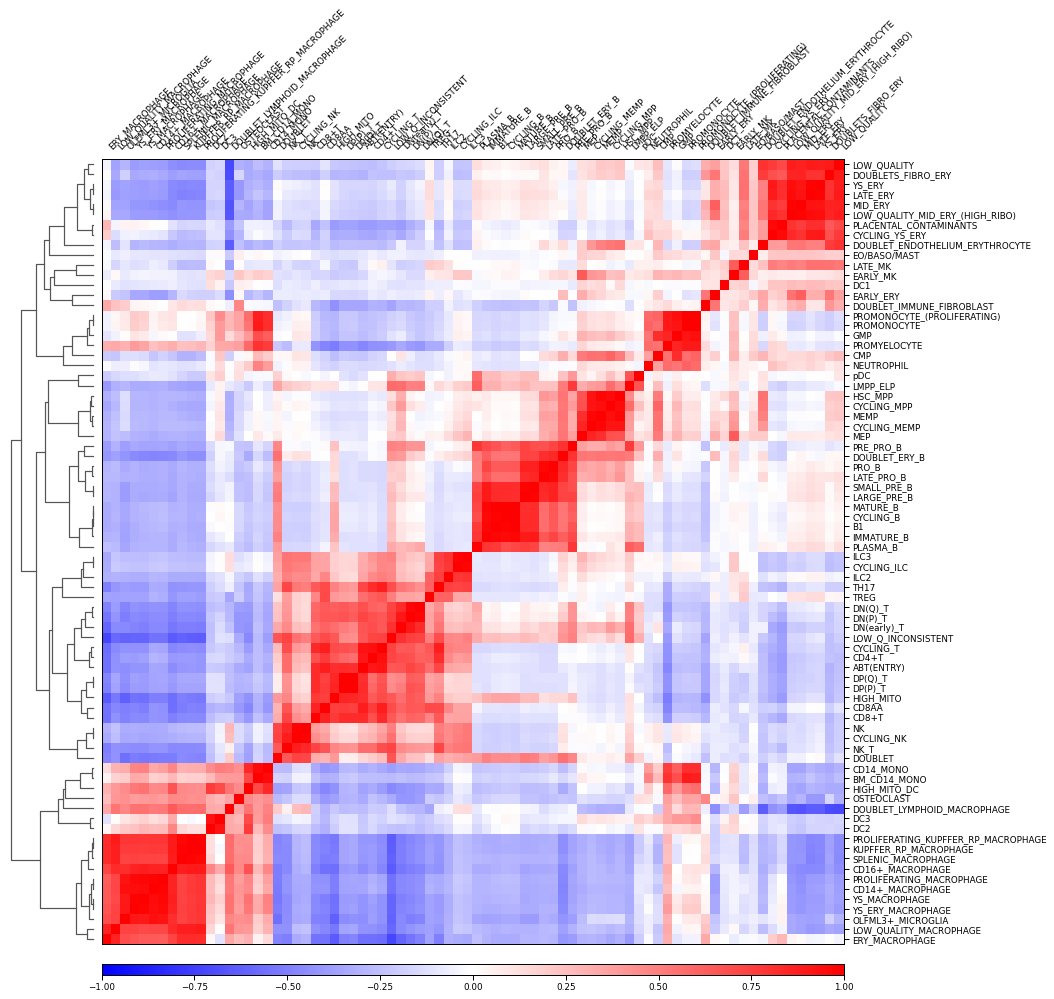

In [70]:
sns.set_context("paper")
sdata_immune_subset = sdata_immune[~sdata_immune.obs.anno_lvl_2_final_clean.isin(anno_groups_dict["STROMA"])]
sdata_immune_subset.obs['anno_lvl_2_final_clean'] = sdata_immune_subset.obs['anno_lvl_2_final_clean'].astype("str").astype("category")
del sdata_immune_subset.uns['dendrogram_anno_lvl_2_final_clean']
ax = sc.pl.correlation_matrix(sdata_immune_subset, 'anno_lvl_2_final_clean', figsize=(15,15))

Trying to set attribute `.obs` of view, copying.


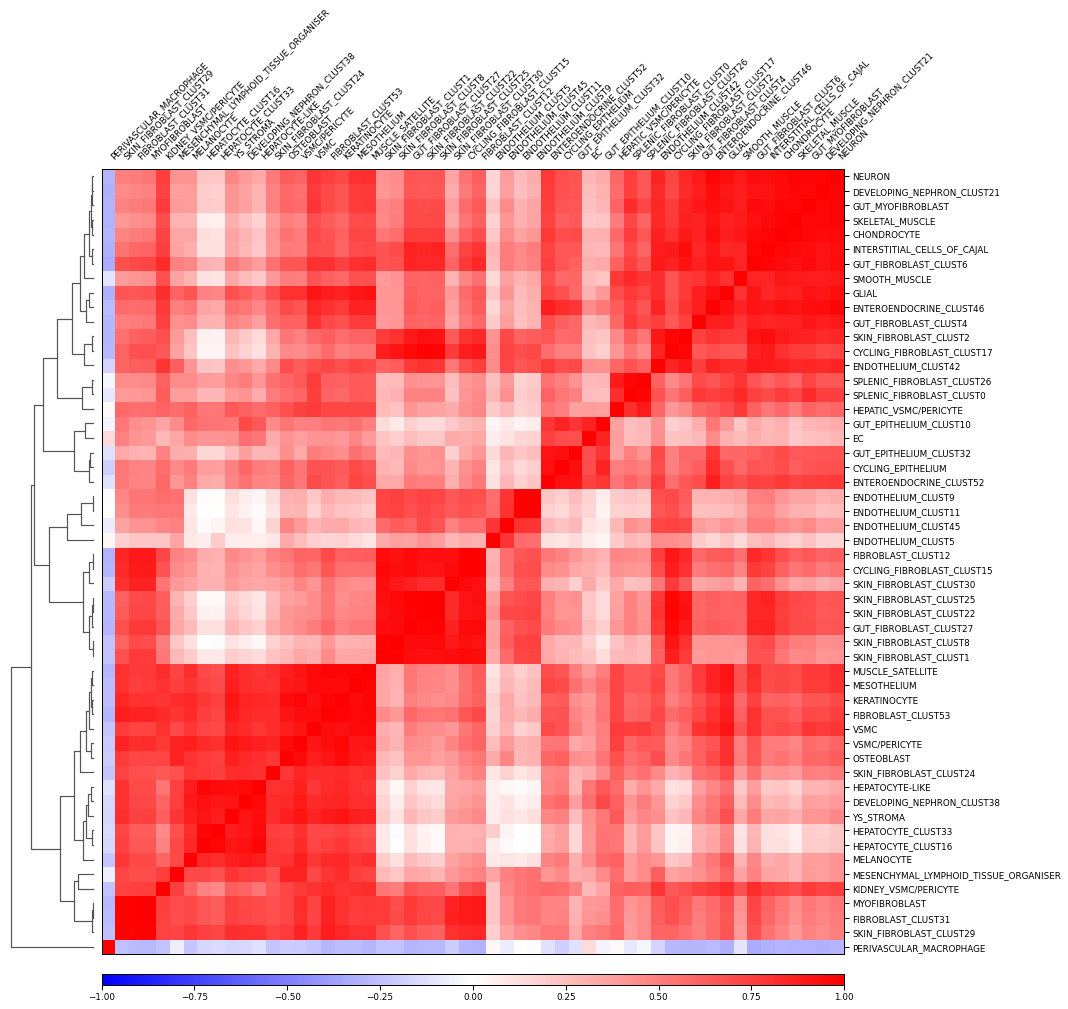

In [71]:
sns.set_context("paper")
sdata_lung_subset = sdata_immune[sdata_immune.obs.anno_lvl_2_final_clean.isin(anno_groups_dict["STROMA"])]
sdata_lung_subset.obs['anno_lvl_2_final_clean'] = sdata_lung_subset.obs['anno_lvl_2_final_clean'].astype("str").astype("category")
del sdata_lung_subset.uns['dendrogram_anno_lvl_2_final_clean']
ax = sc.pl.correlation_matrix(sdata_lung_subset, 'anno_lvl_2_final_clean', figsize=(15,15))

## Use GeneBasisR

Approach from https://www.biorxiv.org/content/10.1101/2021.08.10.455720v1. For each gene, I calculate how predictable it's expression is from the expression in nearest neighbors in (A) the KNN graph on the scVI latent space (`spearmans_true`) and (B) the KNN graph on the panel genes (`spearmans_selection`)

In [28]:
def binarize_knn(knn):
    bin_knn = knn.copy()
    bin_knn[bin_knn.nonzero()] = 1
    return(bin_knn)

def impute_expr(adata, knn):
    imputed_X = adata.X.T.dot(knn)
    imputed_X = imputed_X.T/knn.sum(1)
    return(scipy.sparse.csr_matrix(imputed_X))

def geneBasis_gene_score(adata_bcells, selection_genes, true_knn = None, selection_knn = None):
    print("Get KNN graphs...")
    ## Get true KNN graph
    if true_knn is None:
        true_knn = adata_bcells.obsp["connectivities"].copy()
    
    ## Get KNN graph on gene selection
    adata_selection = adata_bcells[:,adata_bcells.var_names.isin(selection_genes)]
    if selection_knn is None:
        sc.pp.scale(adata_selection)
        sc.pp.pca(adata_selection)
        sc.pp.neighbors(adata_selection, n_neighbors=k)
        selection_knn = adata_selection.obsp["connectivities"].copy()
    
    true_knn = binarize_knn(true_knn)
    selection_knn = binarize_knn(selection_knn)

    if not true_knn.shape == selection_knn.shape:
        raise ValueError("Selection and true knn graph are not of the same shape")
    
    print("Impute expression values from true graph...")
    real_X = adata_bcells.X.toarray()
    imputed_true_X = impute_expr(adata_bcells, true_knn)
    imputed_true_X = imputed_true_X.toarray()
    
    print('Correlate true and imputed expression values from true graph..')
    spearmans_true = []
    for i in range(imputed_true_X.shape[1]):
        spearman_rho = scipy.stats.spearmanr(real_X[:,i], imputed_true_X[:,i]).correlation
        print(i, end = '')
        spearmans_true.append(spearman_rho)

    del imputed_true_X
    spearmans_true = np.array(spearmans_true)
    keep_genes = spearmans_true > 0.25

    print('Impute expression values from selection graph...')
    imputed_selection_X = impute_expr(adata_bcells[:,keep_genes], selection_knn)
    imputed_selection_X = imputed_selection_X.toarray()
    
    real_X = real_X[:,keep_genes]
    
    print('Correlate true and imputed expression values from expression graph...')
    spearmans_selection = []
    for i in range(imputed_selection_X.shape[1]):
        spearman_rho = scipy.stats.spearmanr(real_X[:,i], imputed_selection_X[:,i]).correlation
        print(i, end = '')
        spearmans_selection.append(spearman_rho)
    del imputed_selection_X
    del real_X
    spearmans_selection = np.array(spearmans_selection)
    
    print('Save results...')
    gene_scores_df = pd.DataFrame(scipy.vstack([spearmans_selection, spearmans_true[keep_genes]]).T)
    gene_scores_df.columns = ['spearmans_selection', "spearmans_true"]
    gene_scores_df["gene"] = adata_bcells[:,keep_genes].var_names
    return(gene_scores_df)
# gene_scores_df["subset"] = "B CELLS"

In [30]:
k = 5
adata_bcells = adata[adata.obs["anno_lvl_2_final_clean"].isin(anno_groups_dict["B CELLS"])].copy()
sc.pp.neighbors(adata_bcells, use_rep="X_scvi", n_neighbors=k)

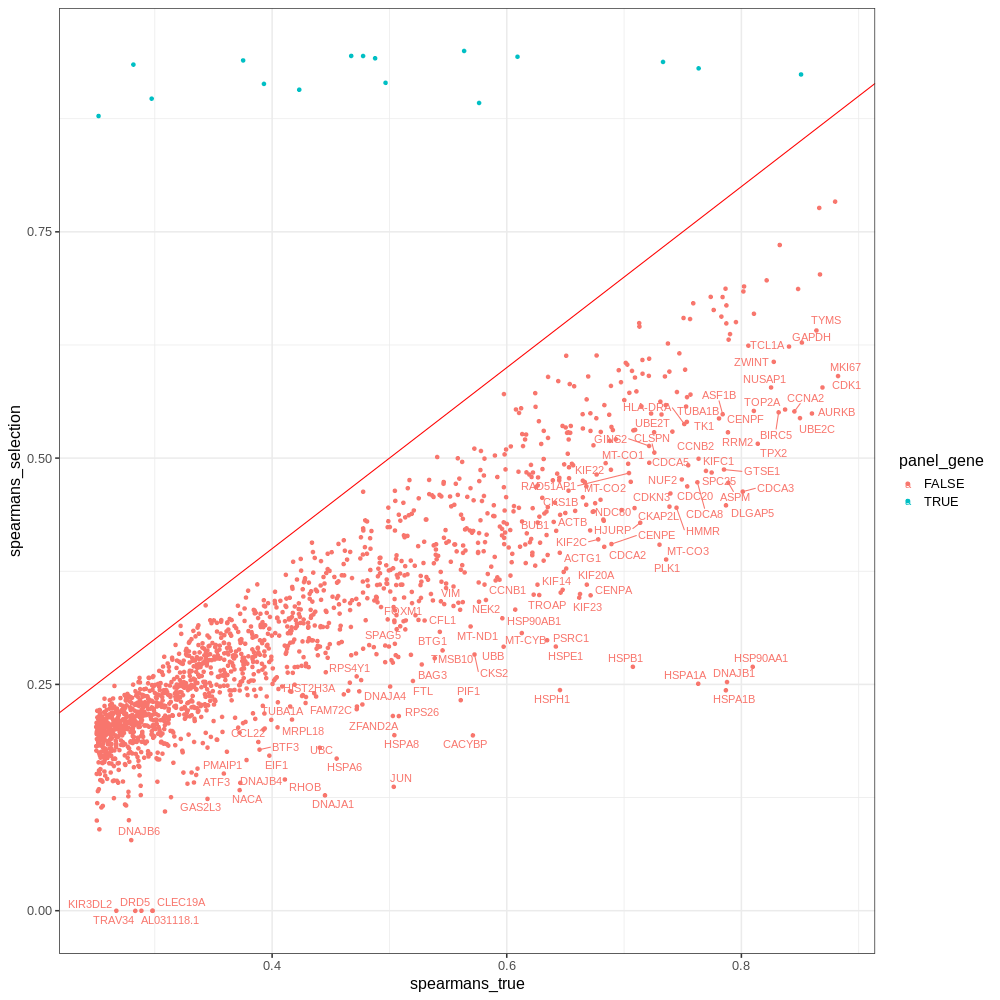

In [159]:
%%R -i gene_scores_df -i selection_genes -w 1000 -h 1000
library(ggrepel)
gene_scores_df %>%
filter(keep_genes==1) %>%
mutate(diff=spearmans_true - spearmans_selection) %>%
mutate(label=ifelse( diff > 0.1, gene, NA)) %>%
mutate(panel_gene = gene %in% selection_genes) %>%
ggplot(aes(spearmans_true, spearmans_selection, color=panel_gene)) +
geom_point() +
geom_abline(color="red") +
geom_text_repel(data= . %>% filter(diff > 0.2), aes(label=gene)) +
        theme_bw(base_size=16) 

In [37]:
outdir = data_dir + "ISS_panel_output/"
# os.mkdir(outdir)

In [167]:
gene_scores_df.to_csv(outdir + "gene_scores_immune_panel.B_CELLS.csv")

In [29]:
k = 5
adata_ery = adata[adata.obs["anno_lvl_2_final_clean"].isin(anno_groups_dict["ERYTHROID CELLS"])].copy()
sc.pp.neighbors(adata_ery, use_rep="X_scvi", n_neighbors=k)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [30]:
import gc
gc.collect()

73261

In [ ]:
gene_scores_df = geneBasis_gene_score(adata_ery, selection_genes=panel_immune)

In [33]:
selection_genes=panel_immune

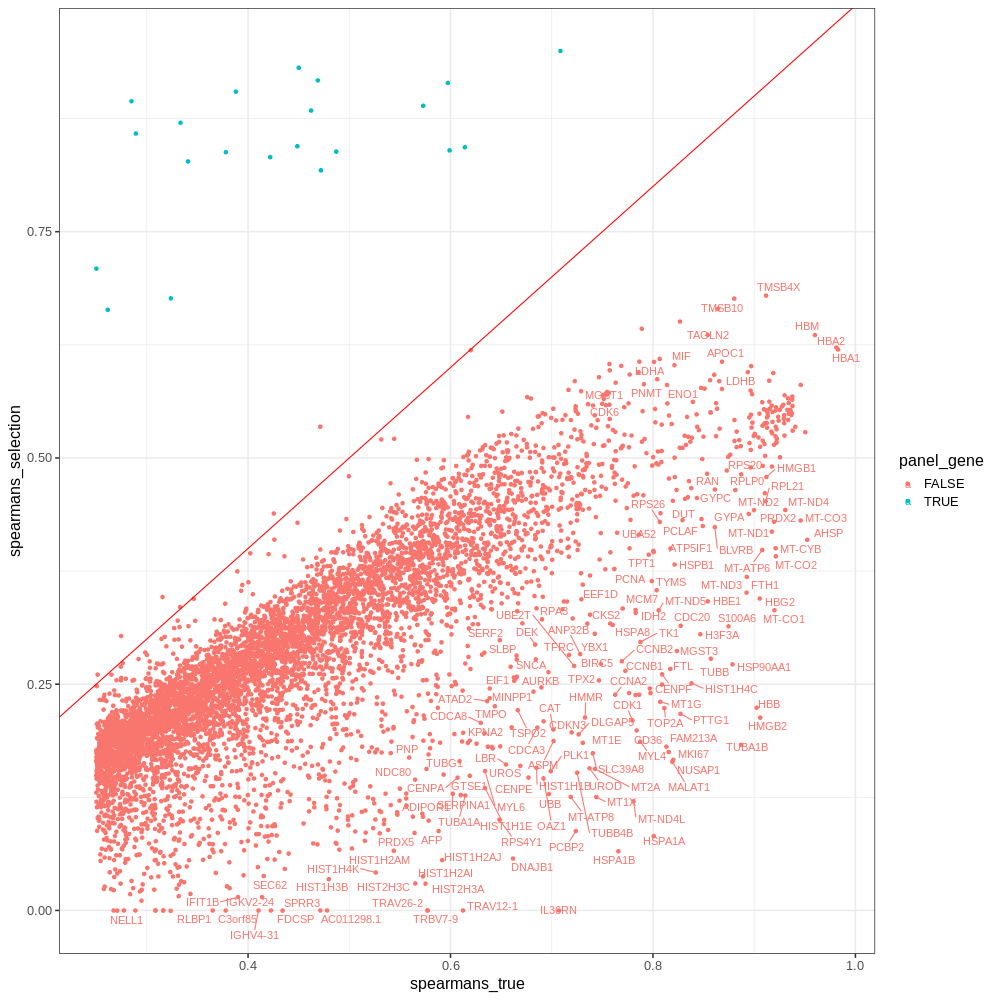

In [36]:
%%R -i gene_scores_df -i selection_genes -w 1000 -h 1000
library(ggrepel)
gene_scores_df %>%
mutate(diff=spearmans_true - spearmans_selection) %>%
mutate(label=ifelse( diff > 0.1, gene, NA)) %>%
mutate(panel_gene = gene %in% selection_genes) %>%
ggplot(aes(spearmans_true, spearmans_selection, color=panel_gene)) +
geom_point() +
geom_abline(color="red") +
geom_text_repel(data= . %>% filter(diff > 0.2), aes(label=gene)) +
        theme_bw(base_size=16) 

In [38]:
gene_scores_df.to_csv(outdir + "gene_scores_immune_panel.ERYTHROID_CELLS.csv")

In [30]:
k = 30
sc.pp.neighbors(adata, use_rep="X_scvi", n_neighbors=k)

In [31]:
import gc
gc.collect()

66583

In [ ]:
gene_scores_df = geneBasis_gene_score(adata, selection_genes=panel_immune)

Get KNN graphs...


/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Impute expression values from true graph...


In [ ]:
%%R -i gene_scores_df -i selection_genes -w 1000 -h 1000
library(ggrepel)
gene_scores_df %>%
mutate(diff=spearmans_true - spearmans_selection) %>%
mutate(label=ifelse( diff > 0.1, gene, NA)) %>%
mutate(panel_gene = gene %in% selection_genes) %>%
ggplot(aes(spearmans_true, spearmans_selection, color=panel_gene)) +
geom_point() +
geom_abline(color="red") +
geom_text_repel(data= . %>% filter(diff > 0.2), aes(label=gene)) +
        theme_bw(base_size=16) 